In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [69]:
df=pd.read_csv("C:/Users/djiko/Documents/ESME/Ingé2/Projet Clustering/ISCXURL2016/FinalDataset/All_BestFirst.csv")
df

,domain_token_count,executable,NumberofDotsinURL,Arguments_LongestWordLength,NumberRate_Domain,NumberRate_FileName,NumberRate_AfterPath,Entropy_Domain,class
0,19,0,18,-1,0.041,0.656,-1.0,0.612,phishing
1,15,0,15,-1,0.083,0.000,-1.0,0.633,phishing
2,15,0,15,-1,0.083,0.000,-1.0,0.633,phishing
3,14,0,13,-1,0.038,-1.000,-1.0,0.659,phishing
4,13,0,13,-1,0.232,0.000,-1.0,0.705,phishing
...,...,...,...,...,...,...,...,...,...
36689,2,0,1,-1,0.000,-1.000,-1.0,0.714,phishing
36690,2,0,1,-1,0.000,-1.000,-1.0,0.699,benign
36691,2,0,1,-1,0.000,-1.000,-1.0,0.699,benign
36692,2,0,1,-1,0.000,-1.000,-1.0,0.699,benign


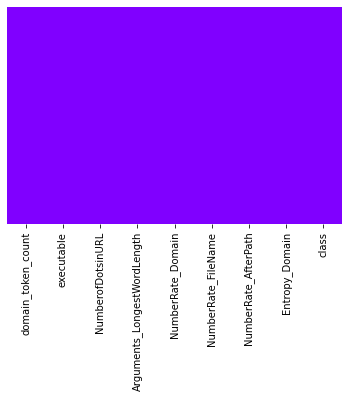

In [70]:
#Check if missing data
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="rainbow")
plt.show()

In [71]:
df.isnull().sum()

domain_token_count             0
executable                     0
NumberofDotsinURL              0
Arguments_LongestWordLength    0
NumberRate_Domain              0
NumberRate_FileName            0
NumberRate_AfterPath           0
Entropy_Domain                 0
class                          0
dtype: int64

In [72]:
df.duplicated().sum()

25626

c:\Users\djiko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\djiko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\djiko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

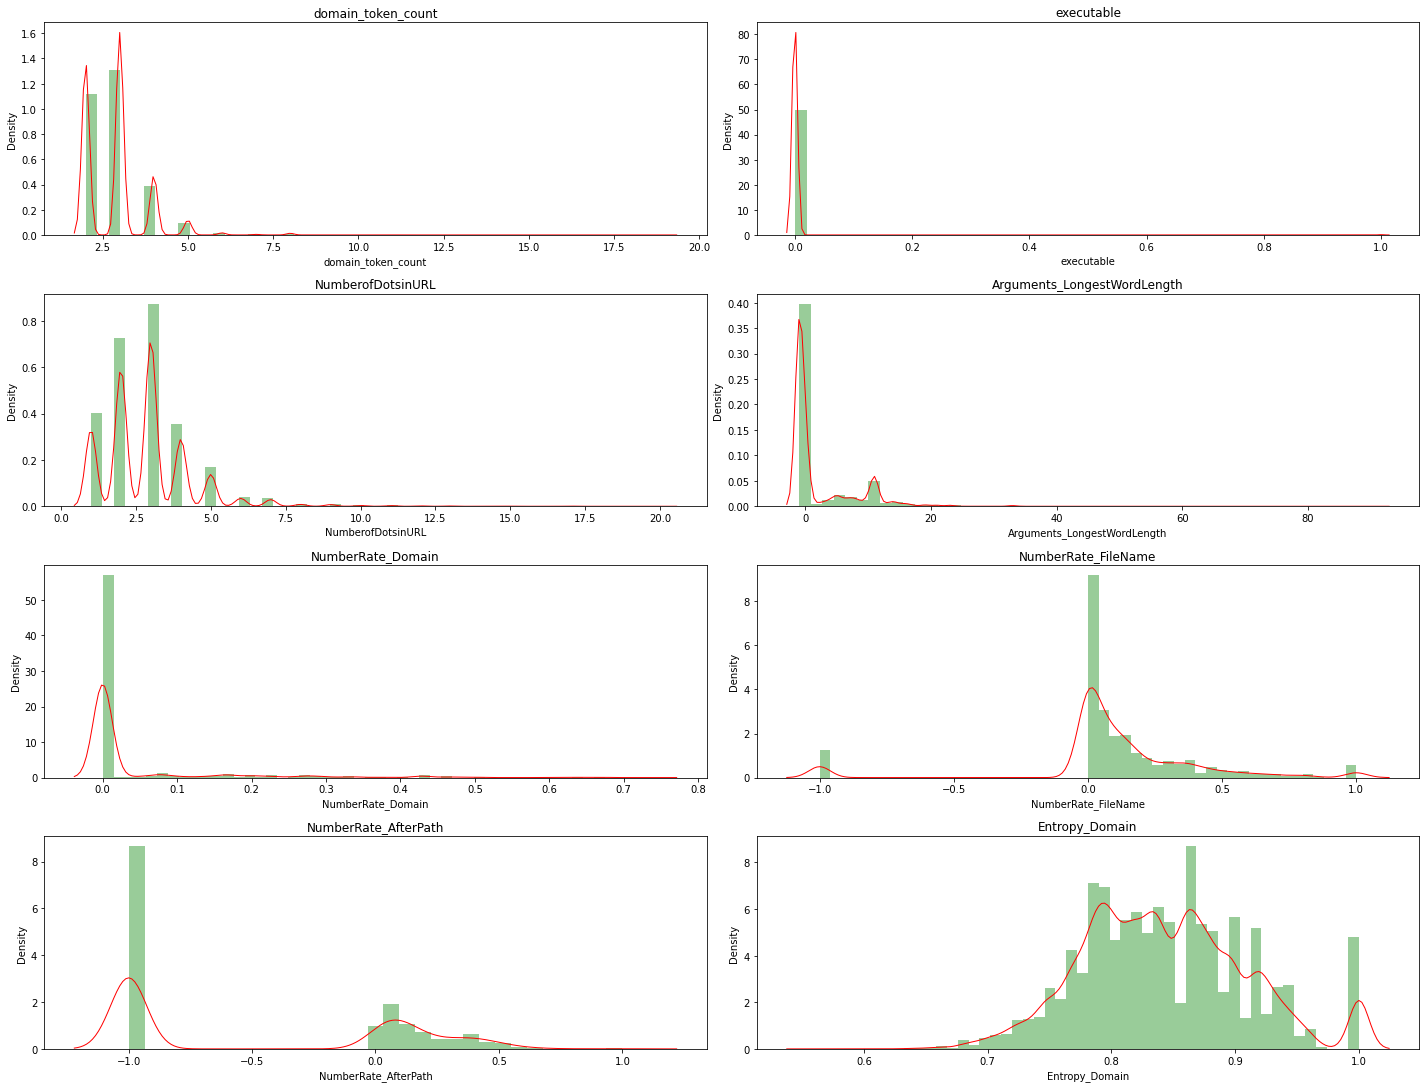

In [73]:
plt.figure(figsize=(20,60))
for i in range(len(df.columns)-1):
  plt.subplot(16, 2, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "r", "lw": 1, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

c:\Users\djiko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


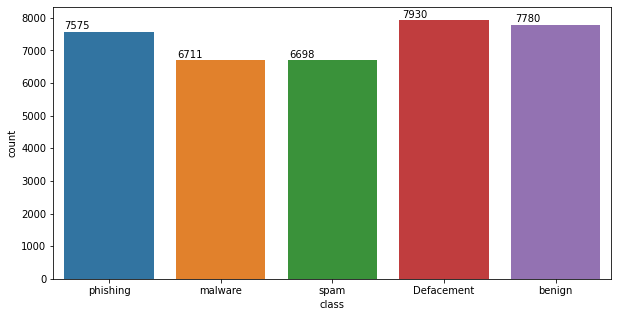

In [74]:
plt.figure(figsize = (10,5))
ax=sns.countplot(df['class'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

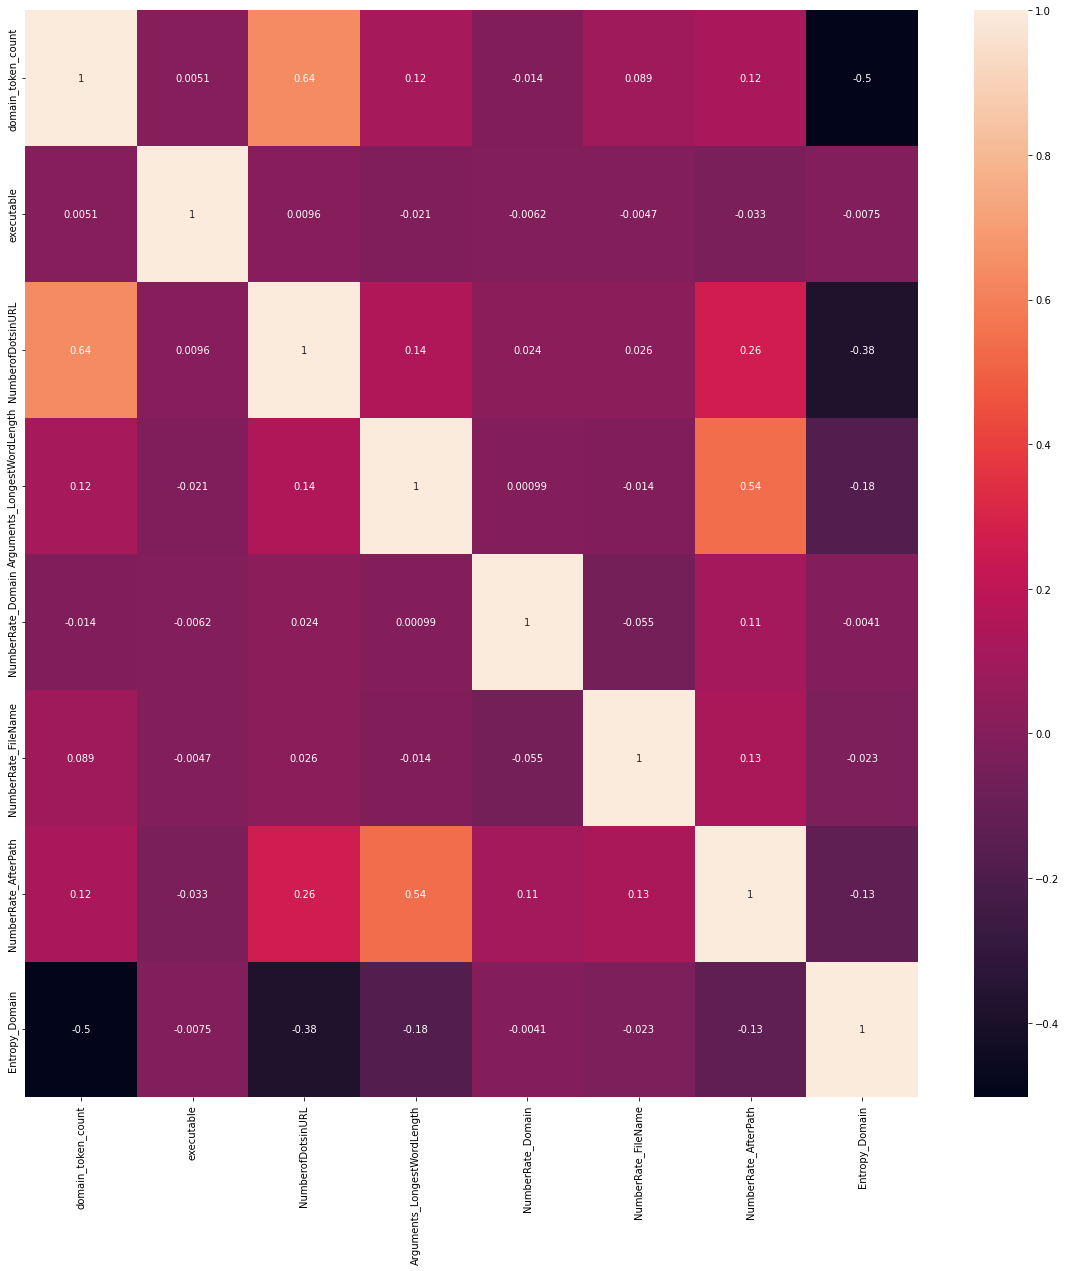

In [75]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
plt.show()

K-Means

In [ ]:
scaler = StandardScaler()
df = df.replace('Defacement', 1)
df = df.replace('benign', 0)
df = df.replace('malware', 2)
df = df.replace('phishing', 3)
df = df.replace('spam', 4)
df_scaled = scaler.fit_transform(df)

In [92]:
X=df.drop("class",axis=1)
y=df["class"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


On essaye de déterminer le nombre de clusters optimales pour le K-Means

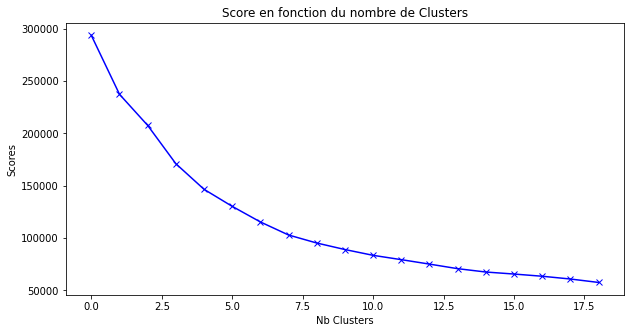

In [77]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X_scaled)
  scores_1.append(kmeans.inertia_) 
plt.figure(figsize = (10,5))
plt.plot(scores_1, 'bx-')
plt.title('Score en fonction du nombre de Clusters')
plt.xlabel('Nb Clusters')
plt.ylabel('Scores') 
plt.show()

On peut prendre un nombre de cluster égale à 7 car la courbe d"inertie devient linéaire à partir de 7

In [94]:
kmeans = KMeans(7)
kmeans.fit(X_scaled)
labels = kmeans.labels_

In [79]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [X.columns])
cluster_centers    

,domain_token_count,executable,NumberofDotsinURL,Arguments_LongestWordLength,NumberRate_Domain,NumberRate_FileName,NumberRate_AfterPath,Entropy_Domain
0,1.574498,-0.037307,1.523151,0.526614,-0.201024,0.305184,0.648078,-0.669937
1,0.226381,-0.037307,0.050216,-0.572850,-0.225788,0.159072,-0.874509,-0.489611
2,-0.117584,-0.037307,0.154472,0.140298,3.337362,-0.066965,0.681862,-0.336011
3,0.136417,26.804667,0.256273,-0.572869,-0.165965,-0.126439,-0.874693,-0.200510
4,-0.916621,-0.037307,-0.892975,-0.555836,-0.143258,0.144380,-0.759165,1.118074
5,-0.338277,-0.037307,-0.342718,-0.230482,-0.112661,-3.307251,-0.779398,0.058440
6,-0.160891,-0.037307,-0.046449,0.745385,-0.282380,0.142543,1.109431,-0.037538


In [95]:
cluster_labels = kmeans.predict(X_scaled)
df_cluster=pd.DataFrame({'cluster labels':cluster_labels,'article titles': y})
print(df_cluster.sort_values('cluster labels'))

df_ct =pd.DataFrame({'cluster labels':cluster_labels,'type_url':y})

ct=pd.crosstab(df_ct['cluster labels'],df_ct['type_url'])
print(ct)

       cluster labels article titles
27863               0       phishing
28553               0         benign
28552               0         benign
28551               0         benign
28550               0         benign
...               ...            ...
10567               6     Defacement
10568               6     Defacement
10569               6     Defacement
10562               6     Defacement
31267               6         benign

[36694 rows x 2 columns]
type_url        Defacement  benign  malware  phishing  spam
cluster labels                                             
0                      906    5274     1733      2100   167
1                     1122     490     1641      4302  1583
2                      320     194     1503       142    50
3                      284     813      214       313    34
4                     1047     419      803       485  3979
5                        0       0       49         2     0
6                     4251     590      768       

In [96]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(X_scaled)
principal_comp

array([[15.72734823, 10.44422211],
       [12.08754041,  8.30428378],
       [12.08754041,  8.30428378],
       ...,
       [-0.958403  ,  0.96232439],
       [-0.958403  ,  0.96232439],
       [-0.958403  ,  0.96232439]])

In [97]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,15.727348,10.444222
1,12.087540,8.304284
2,12.087540,8.304284
3,10.364912,7.711519
4,9.802171,6.662414


In [98]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,15.727348,10.444222,1
1,12.087540,8.304284,1
2,12.087540,8.304284,1
3,10.364912,7.711519,1
4,9.802171,6.662414,1


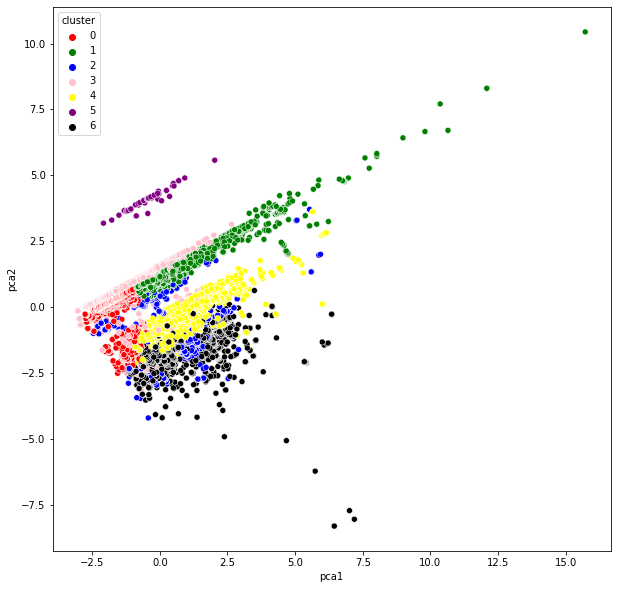

In [99]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','purple', 'black'])
plt.show()

Auto-encoder

In [102]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(8,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(8, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [103]:
autoencoder.fit(X_scaled, X_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
287/287 [==============================] - 8s 26ms/step - loss: 0.1759
Epoch 2/25
287/287 [==============================] - 8s 27ms/step - loss: 0.0529
Epoch 3/25
287/287 [==============================] - 9s 31ms/step - loss: 0.0351
Epoch 4/25
287/287 [==============================] - 9s 31ms/step - loss: 0.0282
Epoch 5/25
287/287 [==============================] - 9s 31ms/step - loss: 0.0345
Epoch 6/25
287/287 [==============================] - 9s 31ms/step - loss: 0.0146
Epoch 7/25
287/287 [==============================] - 9s 32ms/step - loss: 0.0145
Epoch 8/25
287/287 [==============================] - 9s 31ms/step - loss: 0.0109
Epoch 9/25
287/287 [==============================] - 9s 32ms/step - loss: 0.0314
Epoch 10/25
287/287 [==============================] - 9s 32ms/step - loss: 0.0183
Epoch 11/25
287/287 [==============================] - 9s 32ms/step - loss: 0.0948
Epoch 12/25
287/287 [==============================] - 9s 32ms/step - loss: 0.0576
Epoch 13/25
2

In [104]:
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_32 (Dense)            (None, 7)                 63        
                                                                 
 dense_33 (Dense)            (None, 500)               4000      
                                                                 
 dense_34 (Dense)            (None, 500)               250500    
                                                                 
 dense_35 (Dense)            (None, 2000)              1002000   
                                                                 
 dense_36 (Dense)            (None, 10)                20010     
                                                                 
 dense_37 (Dense)            (None, 2000)              2200

In [105]:
pred = encoder.predict(X_scaled)

1147/1147 [==============================] - 6s 5ms/step


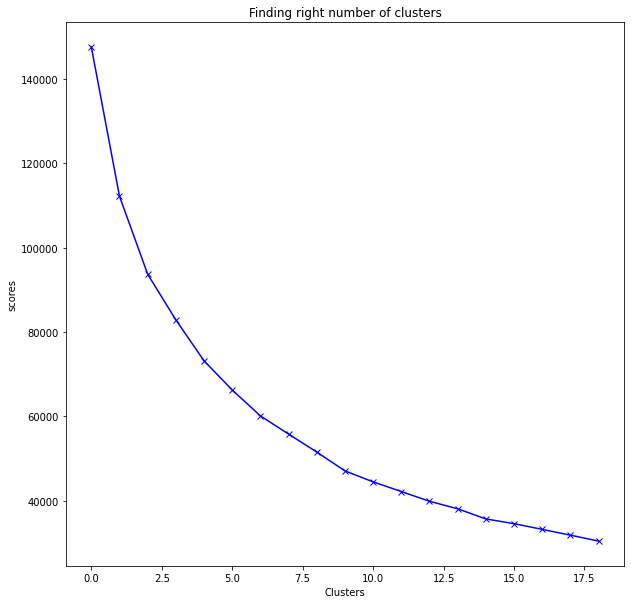

In [106]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)
plt.figure(figsize=(10,10))
plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

C:\Users\djiko\AppData\Local\Temp\ipykernel_19604\2583558016.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
C:\Users\djiko\AppData\Local\Temp\ipykernel_19604\2583558016.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


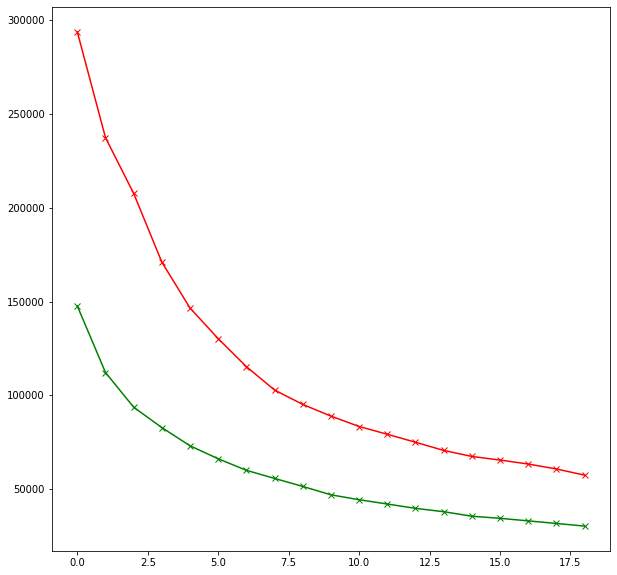

In [109]:
plt.figure(figsize=(10,10))
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')
plt.show()

In [119]:
kmeans = KMeans(5)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(df_scaled)

In [120]:
cluster_labels=labels
df_cluster=pd.DataFrame({'cluster labels':cluster_labels,'article titles': y})
print(df_cluster.sort_values('cluster labels'))

df_ct =pd.DataFrame({'cluster labels':cluster_labels,'type_url':y})

ct=pd.crosstab(df_ct['cluster labels'],df_ct['type_url'])
print(ct)

       cluster labels article titles
14051               0           spam
9543                0     Defacement
9544                0     Defacement
9545                0     Defacement
9546                0     Defacement
...               ...            ...
6366                4       phishing
6365                4       phishing
6364                4       phishing
6362                4       phishing
0                   4       phishing

[36694 rows x 2 columns]
type_url        Defacement  benign  malware  phishing  spam
cluster labels                                             
0                     5392    1088     1967       658  4063
1                     1037    1621     1125      3439  1138
2                        0       0       49         2     0
3                     1501    4901     3491      3033  1401
4                        0     170       79       443    96


In [110]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,domain_token_count,executable,NumberofDotsinURL,Arguments_LongestWordLength,NumberRate_Domain,NumberRate_FileName,NumberRate_AfterPath,Entropy_Domain,class,cluster
0,19,0,18,-1,0.041,0.656,-1.0,0.612,phishing,3
1,15,0,15,-1,0.083,0.000,-1.0,0.633,phishing,3
2,15,0,15,-1,0.083,0.000,-1.0,0.633,phishing,3
3,14,0,13,-1,0.038,-1.000,-1.0,0.659,phishing,3
4,13,0,13,-1,0.232,0.000,-1.0,0.705,phishing,3


In [111]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,18.207760,4.485161
1,13.491897,2.963330
2,13.491896,2.963319
3,12.930751,2.558471
4,10.227765,2.021575


In [112]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,18.207760,4.485161,3
1,13.491897,2.963330,3
2,13.491896,2.963319,3
3,12.930751,2.558471,3
4,10.227765,2.021575,3


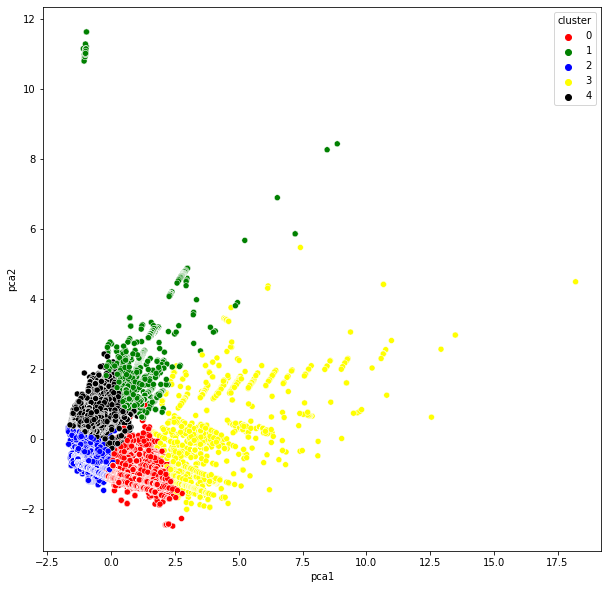

In [113]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow','black'])
plt.show()